In [1]:
import numpy as np
import matplotlib.pyplot as plt

$\large\textbf{Quesstions_7and_8 of Exercise 2_}\large\textbf{Lab 8}$



**Question_1:**


\begin{align}
\underset{w \in R^d}{\text{min}} f(w) = \frac{1}{2}\lambda||w||_2^2 + \frac{1}{n} \sum_{i = 1}^{n}L(y_i, w^\top x_i) 
\end{align}
Let us assume that:  $z = y_iw^Tx_i ,$ then the loss functions $L_h ,L_l \ and \ L_{sh} \ is \ equivalently \ written \ as:$ \\

$\Rightarrow G_h(z) = \text{max}\{0,1 - z\}$  **(hinge)**

$\Rightarrow G_l(z) = \text{log}(1 + exp(-z))$  **(logistic)**

$\Rightarrow G_{sh}(z) = (\text{max}\{0,1 - z\})^2$  **(squared hinge)**


In [2]:
#we will load the iris data from scikit-learn package
from sklearn.datasets import load_iris
iris = load_iris()
#check the shape of iris data
print(iris.data.shape)
A = iris.data
#check the shape of iris target
print(iris.target.shape)
#How many labels does iris data have?
#C=num_of_classes
#print(C)
n = iris.data.shape[0] #Number of data points
d = iris.data.shape[1] #Dimension of data points
#In the following code, we create a nx1 vector of target labels
y = 1.0*np.ones([A.shape[0],1])
for i in range(iris.target.shape[0]):
  if iris.target[i] != 1:
    # y[i] = ???? # Convert class labels that are not 1 into -1
    y[i] = -1  
#Create an index array
indexarr = np.arange(n) #index array
np.random.shuffle(indexarr) #shuffle the indices

#check indexarr after shuffling
#Use the first 80% of indexarr to create the train data and the remaining 20% to create the test data
train_data = [] ; train_label = []
test_data = [] ; test_label = []

count = 1
for i in indexarr:
  if count <= int(0.8*n):
    train_data.append(list(A[i]))
    train_label.append(list(y[i]))
  else:
    test_data.append(list(A[i]))
    test_label.append(list(y[i]))
  count += 1

train_data = np.array(train_data) ; train_label = np.array(train_label)

test_data = np.array(test_data) ; test_label = np.array(test_label)

(150, 4)
(150,)


In [3]:
def predict(w,x):
  pr = np.matmul(w.T, x)
  if pr > 0:
    return 1
  elif  pr < 0:
    return -1
  else:
   return 0

In [4]:
def compute_accuracy(data,labels,model_w):
  accuracy = 0
  n = len(labels)
  for i in range(n):
    if predict(model_w, np.reshape(data[i], (np.shape(data)[1],1))) == labels[i]:
      accuracy += 1
  return accuracy/n
compute_accuracy(train_data, train_label, np.ones((4, 1)))

0.3416666666666667

$\large\textbf{Q1._Answer:}$ \
An appropriate choice of $f_i(\mathbf{w})$ is given as : \
\begin{equation*}
f_i(\mathbf{w}) = \frac{\lambda}{2n} \mathbf{w^Tw} + \frac{1}{n}\text{max}\{0, 1 - y_i \mathbf{w^T}\mathbf{x_i}\}
\end{equation*}

$\large\textbf{Q2.}$  Module to  compute loss the function $L_h, L_l, L_{sh}$.

In [5]:
def compute_loss_h(w,x,y):
  return max(0, np.subtract(1, np.dot(y, np.dot(w, np.transpose(x)))))

def compute_loss_l(w,x,y):
  return np.log(np.add(1, np.exp(-np.dot(y, np.dot(w, np.transpose(x))))))

def compute_loss_sh(w,x,y):
  return max(0, np.subtract(1, np.dot(y, np.dot(w, np.transpose(x)))))**2

$\large\textbf{Q3}:$   python routine to compute the objective function value. Using the compute loss function.



In [6]:
def compute_objfnval_h(data,labels,w):
  return np.add(np.multiply(lamda/2 , np.linalg.norm(w)**2), sum(compute_loss_h(w,x[i],y[i]) for i in range(data.shape[0]))/data.shape[0])

In [7]:
def compute_objfnval_l(data,labels,w):
  return np.add(np.multiply(lamda/2 , np.linalg.norm(w)**2), sum(compute_loss_l(w,x[i],y[i]) for i in range(data.shape[0]))/data.shape[0])

In [8]:
def compute_objfnval_sh(data,labels,w):
  return np.add(np.multiply(lamda/2 , np.linalg.norm(w)**2), sum(compute_loss_sh(w,x[i],y[i]) for i in range(data.shape[0]))/data.shape[0])

$\large\textbf{Q4: }$  python function to compute the
gradient. \\
 
The gradient $g_i(w) = \nabla_wf_i(w)$ is given by :

if $y_iw^\top x_i \geq 1 $ then $ \nabla_wf_i(w)$ = $\frac{\lambda}{n}w$


if $y_iw^\top x_i < 1 $ then $ \nabla_wf_i(w)$ = $\frac{\lambda}{n}w - y_ix_i$


In [9]:
def compute_grad_loss_h(x,y,w,i):
  loss = 0
  if np.multiply(y[i], np.dot(w, np.transpose(x[i]))) >= 1:
    loss = np.multiply(lamda, w)/data.shape[0]
  else:
    loss = np.subtract(np.multiply(lamda, w), np.multiply(y[i], np.transpose(x[i])))/data.shape[0]
  return loss

def compute_grad_loss_l(data, label,w ,i):
  #print(np.subtract(np.multiply(lamda, w), np.multiply(np.multiply(label[i], np.transpose(data[i])), np.exp(-np.dot(label[i], np.dot(w, np.transpose(data[i])))))/np.add(1, np.exp(-np.dot(label[i], np.dot(w, np.transpose(data[i]))))))/data.shape[0])
  return np.subtract(np.multiply(lamda, w), np.multiply(np.multiply(label[i], np.transpose(data[i])), np.exp(-np.dot(label[i], np.dot(w, np.transpose(data[i])))))/np.add(1, np.exp(-np.dot(label[i], np.dot(w, np.transpose(data[i]))))))/data.shape[0]

def compute_grad_loss_sh(x,y,w,i):
  loss = 0
  if np.dot(y[i], np.dot(w, np.transpose(x[i]))) >= 1:
    loss = np.multiply(lamda, w)/data.shape[0]
  else:
    loss = np.subtract(np.multiply(lamda, w), np.multiply(np.multiply(2, np.subtract(1, np.dot(y[i], np.dot(w, np.transpose(x[i]))))), np.multiply(y[i], np.transpose(x[i]))))/data.shape[0]
  return loss

$\Large\textbf{Q7}$

In [10]:
#logistic with 1000 epochs
def OPT1_h(data, label, lamda, epochs):
  t = 1
  #initialize w
  w = np.zeros(data.shape[1]) ; arr = np.arange(data.shape[0])
  
  fval_array = []
  test_set_accuracy_arr = [] ; train_set_accuracy_arr = []
  
  x = data
  epoch = 0
  precision = False
  for epoch in range(epochs):
    np.random.shuffle(arr) #shuffle every epoch
    for i in np.nditer(arr): #Pass through the data points
      step = 1/t
      w = np.subtract(w, np.multiply(step, compute_grad_loss_h(x,y,w,i))) # Update w using w <- w - step * g_i (w)
      t = t+1
    if epoch % 1 == 0:
      train_set_accuracy_arr.append(compute_accuracy(train_data, train_label, w))
      test_set_accuracy_arr.append(compute_accuracy(test_data, test_label, w))
      fval_array.append(compute_objfnval_h(data,label,w))
    epoch += 1
  return w, fval_array, test_set_accuracy_arr, train_set_accuracy_arr

In [11]:
data = train_data ; label = train_label

x = data
num_epochs = 1000
lambda_set = [10**-3,10**-2,0.1, 1, 10]

print("For Hinge Loss Function with 1000 epochs")
for lamda in lambda_set:
  w, fval_array, test_set_accuracy_arr, train_set_accuracy_arr = OPT1_h(data,label,lamda, num_epochs)
  print("\n When lambda = ", lamda)
  print("Test set accuracy : ", test_set_accuracy_arr[-1],"   and   ","Train set accuracy : ", train_set_accuracy_arr[-1])

For Hinge Loss Function with 1000 epochs

 When lambda =  0.001
Test set accuracy :  0.7    and    Train set accuracy :  0.6583333333333333

 When lambda =  0.01
Test set accuracy :  0.7    and    Train set accuracy :  0.6583333333333333

 When lambda =  0.1
Test set accuracy :  0.7    and    Train set accuracy :  0.6583333333333333

 When lambda =  1
Test set accuracy :  0.7    and    Train set accuracy :  0.6583333333333333

 When lambda =  10
Test set accuracy :  0.7    and    Train set accuracy :  0.6583333333333333


Here, **We obtained other suitable stopping criterion for terminating OPT1**.   \\
 Actually we applied stopping criterion and
checked how it differs from the one in OPT1. \
Using $step = \frac{1}{t}$ and $\lambda \in \{0.001,0.01, 0.1, 1, 10\}$ which achieved the best test set accuracy in the previous experiment as obtained in the above output.

In [12]:
#using Hinge loss function with modified stopping criterion
def OPT2_h(data, label, lamda):
  t = 1
  #initialize w
  w = np.zeros(data.shape[1])
  arr = np.arange(data.shape[0])
  fval_array = []
  test_set_accuracy_arr = [] ;  train_set_accuracy_arr = []
 
  x = data
  epoch = 0
  precision = False
  while (epoch < 200 or precision == False):
    if epoch > 200:
      a2 = train_set_accuracy_arr[-1] - train_set_accuracy_arr[-10]
      if max(a2, -a2) < 10**-5:
        precision = True
    np.random.shuffle(arr) #shuffle every epoch
    for i in np.nditer(arr): #Pass through the data points
      step = 1/t
      w = np.subtract(w, np.multiply(step, compute_grad_loss_h(x,y,w,i))) # Update w using w <- w - step * g_i (w)
      t = t+1
    if epoch % 1 == 0:
      train_set_accuracy_arr.append(compute_accuracy(train_data, train_label, w))
      test_set_accuracy_arr.append(compute_accuracy(test_data, test_label, w))
      fval_array.append(compute_objfnval_h(data,label,w))
    epoch = epoch + 1
  return w, fval_array, test_set_accuracy_arr, train_set_accuracy_arr

In [13]:
lambda_list = [10**-3,10**-2,0.1, 1, 10]
data = train_data
label = train_label
print("For Hinge Loss Function with modified criterion:")
for lamda in lambda_list:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array = OPT2_h(data,label,lamda)
  print("\nFor lambda = ", lamda)
  print("Test set accuracy = ", test_set_accuracy_array[-1],"  and  "," Train set accuracy = ", train_set_accuracy_array[-1])

For Hinge Loss Function with modified criterion:

For lambda =  0.001
Test set accuracy =  0.7   and    Train set accuracy =  0.6583333333333333

For lambda =  0.01
Test set accuracy =  0.7   and    Train set accuracy =  0.6583333333333333

For lambda =  0.1
Test set accuracy =  0.7   and    Train set accuracy =  0.6583333333333333

For lambda =  1
Test set accuracy =  0.7   and    Train set accuracy =  0.6583333333333333

For lambda =  10
Test set accuracy =  0.7   and    Train set accuracy =  0.6583333333333333


$\large\textbf{Q8 (a) Logistic regression  $L_l$,  num_epochs = 1000}$

In [14]:
#logistic with 1000 epochs
def OPT1_l(data, label, lamda, epochs):
  t = 1
  #initialize w
  w = np.zeros(data.shape[1])
  arr = np.arange(data.shape[0])
  fval_array = []
  test_set_accuracy_arr = [] ; train_set_accuracy_arr = []
  
  x = data
  epoch = 0
  precision = False
  for epoch in range(epochs):
    np.random.shuffle(arr) #shuffle every epoch
    for i in np.nditer(arr): #Pass through the data points
      step = 1/t
      w = np.subtract(w, np.multiply(step, compute_grad_loss_l(x,y,w,i))) # Update w using w <- w - step * g_i (w)
      t += 1
    if epoch % 1 == 0:
      train_set_accuracy_arr.append(compute_accuracy(train_data, train_label, w))
      test_set_accuracy_arr.append(compute_accuracy(test_data, test_label, w))
      fval_array.append(compute_objfnval_l(data,label,w))
    epoch += 1
  return w, fval_array, test_set_accuracy_arr, train_set_accuracy_arr

[0.6795705494290419, 0.6793975982108595, 0.679289132210968, 0.6792199417414599, 0.6791762916061035, 0.6791323549747199, 0.6791046235715696, 0.6790779543931769, 0.6790551245198535, 0.6790373613235066, 0.6790184797790304, 0.6790031026274264, 0.6789876601605417, 0.678974669504643, 0.6789626133030137, 0.6789515926281455, 0.6789408544588847, 0.6789308748076347, 0.6789223972872052, 0.6789137391725824, 0.6789056592783047, 0.678898264208445, 0.678890843680492, 0.6788841590001484, 0.6788777037768795, 0.6788716073163712, 0.6788656872116267, 0.6788599031235796, 0.6788543690985926, 0.678849133881401, 0.6788440298085417, 0.6788391056330066, 0.6788345921215873, 0.6788302453868432, 0.678826019241757, 0.6788218092948137, 0.6788176472729595, 0.678813754782177, 0.6788100330306553, 0.6788064979370971, 0.6788030692021347, 0.6787996266729798, 0.6787963425291863, 0.6787932202247787, 0.6787900872282498, 0.6787870482193326, 0.6787840839262375, 0.6787812522414731, 0.6787784452834846, 0.6787757716225764, 0.6787

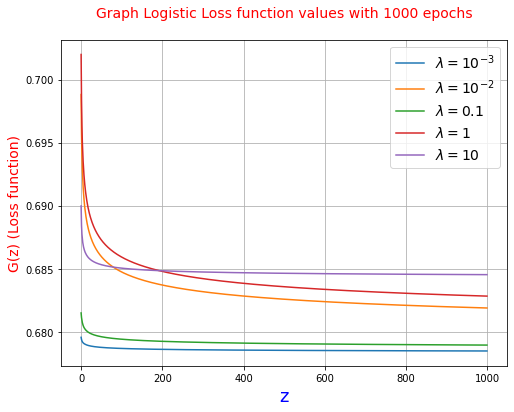

In [15]:
num_epochs = 1000
lambda_list = [10**-3,10**-2, 0.1, 1, 10]
data = train_data
label = train_label
plt.figure(figsize=(8,6))
for lamda in lambda_list:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array = OPT1_l(data,label,lamda, num_epochs)
  print([i[0] for i in fval_array])
  plt.plot(fval_array,label=r'$ $')
  plt.grid()
  plt.title('Graph Logistic Loss function values with 1000 epochs\n',fontsize=14, color = 'r')
  plt.xlabel(r'z',fontsize=18, color = 'b')
  plt.ylabel(r'G(z) (Loss function)',fontsize=14, color = 'r')
  plt.legend(["$\lambda = 10^{-3}$","$\lambda = 10^{-2}$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"],fontsize=14)
plt.show()


In [ ]:
num_epochs = 1000
lambda_list = [10**-3,10**-2, 0.1, 1, 10]
data = train_data
label = train_label
plt.figure(figsize=(8,6))
for lamda in lambda_list:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array = OPT1_l(data,label,lamda, num_epochs)
  plt.plot(test_set_accuracy_array,label=r'$ $')
  plt.grid()
  plt.title('Graph of test set accuracy using logistic loss function with 1000 epochs\n',fontsize=15, color = 'r')
  plt.xlabel(r'z',fontsize=18, color = 'b')
  plt.ylabel(r'Accuracy',fontsize=16, color = 'r')
  plt.legend(["$\lambda = 10^{-3}$","$\lambda = 10^{-2}$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"],fontsize=14)
plt.show()

In [ ]:
num_epochs = 1000
lambda_list = [10**-3,10**-2, 0.1, 1, 10]
data = train_data
label = train_label
plt.figure(figsize=(8,6))
for lamda in lambda_list:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array = OPT1_l(data,label,lamda, num_epochs)
  plt.plot(train_set_accuracy_array,label=r'$ $')
  plt.grid()
  plt.title('Graph of train set accuracy using logistic loss function with 500 epochs\n',fontsize=15, color = 'r')
  plt.xlabel(r'z',fontsize=18, color = 'b')
  plt.ylabel(r'Accuracy',fontsize=15, color = 'r')
  plt.legend(["$\lambda = 10^{-3}$","$\lambda = 10^{-2}$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"],fontsize=14)
plt.show()

In [18]:
num_epochs = 1000
lambda_list = [10**-3,10**-2, 0.1, 1, 10]
data = train_data
label = train_label
print("Using logistic loss function with 1000 epochs")
for lamda in lambda_list:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array = OPT1_l(data,label,lamda, num_epochs)
  print("\nlambda", lamda)
  print("Test set accuracy = ", test_set_accuracy_array[-1],"   and   ","Train set accuracy = ", train_set_accuracy_array[-1])

Using logistic loss function with 1000 epochs

lambda 0.001
Test set accuracy =  0.7    and    Train set accuracy =  0.6583333333333333

lambda 0.01
Test set accuracy =  0.7    and    Train set accuracy =  0.6583333333333333

lambda 0.1
Test set accuracy =  0.7    and    Train set accuracy =  0.6583333333333333

lambda 1
Test set accuracy =  0.7    and    Train set accuracy =  0.6583333333333333

lambda 10
Test set accuracy =  0.7    and    Train set accuracy =  0.6583333333333333


$\large\textbf{Q8. (a) Logistic regression  $L_l$, modified stopping criterion}$

In [19]:
#using logistic loss function with modified stopping criterion
def OPT2_l(data, label, lamda):
  t = 1
  #initialize w
  w = np.zeros(data.shape[1])
  arr = np.arange(data.shape[0])
  fval_array = []
  test_set_accuracy_array = []
  train_set_accuracy_array = []
  x = data
  epoch = 0
  precision = False
  while (epoch < 200 or precision == False):
    if epoch > 200:
      a2 = train_set_accuracy_array[-1] - train_set_accuracy_array[-10]
      if max(a2, -a2) < 10**-5:
        precision = True
    np.random.shuffle(arr) #shuffle every epoch
    for i in np.nditer(arr): #Pass through the data points
      step = 1/t
      w = np.subtract(w, np.multiply(step, compute_grad_loss_l(x,y,w,i))) # Update w using w <- w - step * g_i (w)
      t = t+1
    if epoch % 1 == 0:
      train_set_accuracy_array.append(compute_accuracy(train_data, train_label, w))
      test_set_accuracy_array.append(compute_accuracy(test_data, test_label, w))
      fval_array.append(compute_objfnval_l(data,label,w))
    epoch = epoch + 1
  return w, fval_array, test_set_accuracy_array, train_set_accuracy_array

[0.6823910795502246, 0.6816995343188063, 0.6813396326802688, 0.6811364831495684, 0.680978719876815, 0.6808620873583752, 0.6807547495179703, 0.680672432058374, 0.6806030371175966, 0.6805388619466064, 0.6804865625384157, 0.6804380295914122, 0.6803947069948599, 0.6803557870943666, 0.6803189809398519, 0.6802862672950264, 0.6802553869264955, 0.6802264729812086, 0.6801983228736306, 0.6801736178175226, 0.6801504349273076, 0.6801287930336674, 0.6801071110488178, 0.6800866767991457, 0.6800673583148339, 0.6800488181303264, 0.6800317507054848, 0.6800156792915862, 0.6800002078096941, 0.6799850249867664, 0.6799706574957275, 0.679956602622433, 0.6799435593558907, 0.67993075287604, 0.6799182554245945, 0.6799060957417427, 0.6798946584018748, 0.6798835330655217, 0.6798727579550501, 0.6798621469635915, 0.6798519240219906, 0.6798421729725592, 0.6798324569956404, 0.679823091530744, 0.6798139612822336, 0.6798052522784493, 0.679796666301846, 0.6797882953248654, 0.6797800591648072, 0.6797721626302795, 0.6797

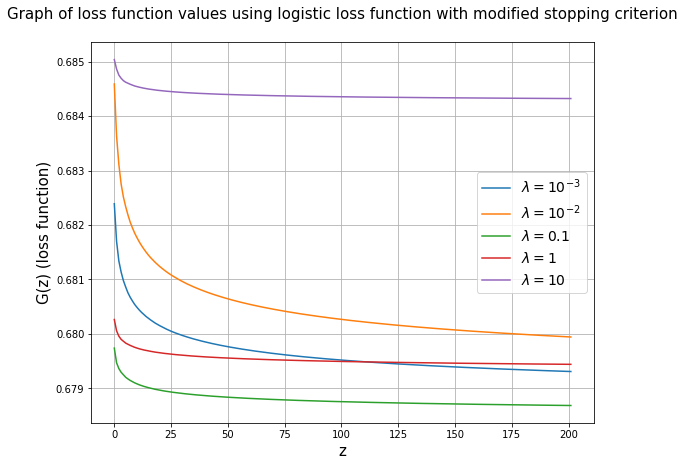

In [20]:
lambda_set = [10**-3,10**-2, 0.1, 1, 10]
data = train_data
label = train_label
plt.figure(figsize=(9,7))
for lamda in lambda_set:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array = OPT2_l(data,label,lamda)
  print([i[0] for i in fval_array])
  plt.plot(fval_array,label=r'$ $')
  plt.grid()
  plt.title('Graph of loss function values using logistic loss function with modified stopping criterion\n',fontsize=15)
  plt.xlabel(r'z',fontsize=15)
  plt.ylabel(r'G(z) (loss function)',fontsize=15)
  plt.legend(["$\lambda = 10^{-3}$","$\lambda = 10^{-2}$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"],fontsize=14)
plt.show()


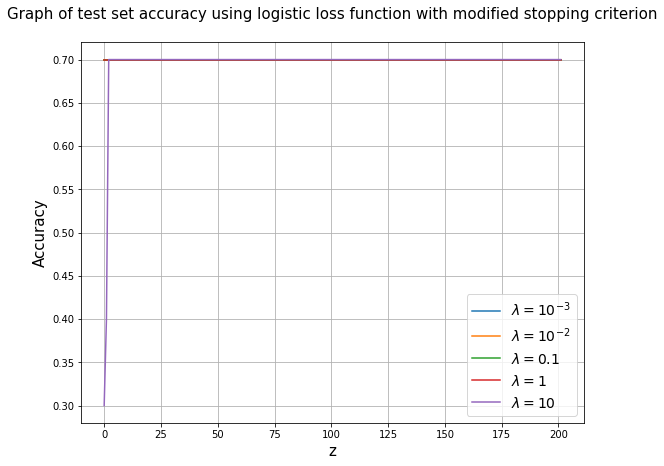

In [21]:
lambda_set = [10**-3,10**-2, 0.1, 1, 10]
data = train_data
label = train_label
plt.figure(figsize=(9,7))
for lamda in lambda_set:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array = OPT2_l(data,label,lamda)
  plt.plot(test_set_accuracy_array,label=r'$ $')
  plt.grid()
  plt.title('Graph of test set accuracy using logistic loss function with modified stopping criterion\n',fontsize=15)
  plt.xlabel(r'z',fontsize=15)
  plt.ylabel(r'Accuracy',fontsize=15)
  plt.legend(["$\lambda = 10^{-3}$","$\lambda = 10^{-2}$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"],fontsize=14)
plt.show()

In [ ]:
lambda_set = [10**-3,10**-2, 0.1, 1, 10]
data = train_data
label = train_label
plt.figure(figsize=(9,7))
for lamda in lambda_set:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array = OPT2_l(data,label,lamda)
  plt.plot(train_set_accuracy_array,label=r'$ $')
  plt.grid()
  plt.title('Graph of train set accuracy using logistic loss function with modified stopping criterion\n',fontsize=15)
  plt.xlabel(r'z',fontsize=15)
  plt.ylabel(r'Accuracy',fontsize=15)
  plt.legend(["$\lambda = 10^{-3}$","$\lambda = 10^{-2}$",  "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"],fontsize=14)
plt.show()

In [ ]:
lambda_set = [10**-3,10**-2, 0.1, 1, 10]
data = train_data
label = train_label
print("Using logistic loss function with modified stopping criterion")
for lamda in lambda_set:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array = OPT2_l(data,label,lamda)
  print("\nlambda", lamda)
  print("Test set accuracy", test_set_accuracy_array[-1])
  print("Train set accuracy", train_set_accuracy_array[-1])

$\large\textbf{Q8(b) Squared hinge loss  $L_{sh}$, num_epochs = 1000}$

In [24]:
def OPT1_sh(data, label, lamda, num_epochs):
  t = 1
  #initialize w
  w = np.zeros(data.shape[1])
  arr = np.arange(data.shape[0])
  fval_array = []
  test_set_accuracy_array = []
  train_set_accuracy_array = []
  x = data
  for epoch in range(num_epochs):
    np.random.shuffle(arr) #shuffle every epoch
    for i in np.nditer(arr): #Pass through the data points
      step = 1/t
      w = np.subtract(w, np.multiply(step, compute_grad_loss_sh(x,y,w,i))) # Update w using w <- w - step * g_i (w)
      t = t+1
    if epoch % 1 == 0:
      train_set_accuracy_array.append(compute_accuracy(train_data, train_label, w))
      test_set_accuracy_array.append(compute_accuracy(test_data, test_label, w))
      fval_array.append(compute_objfnval_sh(data,label,w))
  return w, fval_array, test_set_accuracy_array, train_set_accuracy_array

In [ ]:
num_epochs = 1000
lambda_set = [10**-3,10**-2, 0.1, 1, 10]
data = train_data
label = train_label
plt.figure(figsize=(9,7))
for lamda in lambda_set:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array = OPT1_sh(data,label,lamda, num_epochs)
  print([i[0] for i in fval_array])
  plt.plot(fval_array,label=r'$ $')
  plt.grid()
  plt.title('Graph of function values\n',fontsize=15)
  plt.xlabel(r'z',fontsize=15)
  plt.ylabel(r'G(z) (loss function)',fontsize=15)
  plt.legend(["$\lambda = 10^{-3}$","$\lambda = 10^{-2}$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"],fontsize=14)
plt.show()

In [ ]:
num_epochs = 1000
lambda_set = [10**-3,10**-2, 0.1, 1, 10]
data = train_data
label = train_label
plt.figure(figsize=(9,7))
for lamda in lambda_set:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array = OPT1_sh(data,label,lamda, num_epochs)
  plt.plot(test_set_accuracy_array,label=r'$ $')
  plt.grid()
  plt.title('Graph of test set accuracy\n',fontsize=15)
  plt.xlabel(r'z',fontsize=15)
  plt.ylabel(r'Accuracy',fontsize=15)
  plt.legend(["$\lambda = 10^{-3}$","$\lambda = 10^{-2}$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"],fontsize=14)
plt.show()

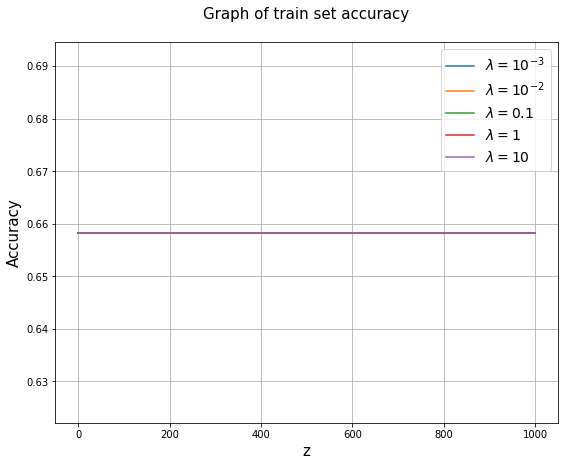

In [27]:
num_epochs = 1000
lambda_set = [10**-3,10**-2, 0.1, 1, 10]
data = train_data
label = train_label
plt.figure(figsize=(9,7))
for lamda in lambda_set:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array = OPT1_sh(data,label,lamda, num_epochs)
  plt.plot(train_set_accuracy_array,label=r'$ $')
  plt.grid()
  plt.title('Graph of train set accuracy\n',fontsize=15)
  plt.xlabel(r'z',fontsize=15)
  plt.ylabel(r'Accuracy',fontsize=15)
  plt.legend(["$\lambda = 10^{-3}$","$\lambda = 10^{-2}$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"],fontsize=14)
plt.show()

In [28]:
num_epochs = 1000
lambda_set = [10**-3,10**-2, 0.1, 1, 10]
data = train_data
label = train_label
for lamda in lambda_set:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array = OPT1_l(data,label,lamda, num_epochs)
  print("\nlambda", lamda)
  print("Test set accuracy", test_set_accuracy_array[-1])
  print("Train set accuracy", train_set_accuracy_array[-1])


lambda 0.001
Test set accuracy 0.7
Train set accuracy 0.6583333333333333

lambda 0.01
Test set accuracy 0.7
Train set accuracy 0.6583333333333333

lambda 0.1
Test set accuracy 0.7
Train set accuracy 0.6583333333333333

lambda 1
Test set accuracy 0.7
Train set accuracy 0.6583333333333333

lambda 10
Test set accuracy 0.7
Train set accuracy 0.6583333333333333


$\large\textbf{Question 8. (b) Squared hinge loss  $L_{sh}$, modified stopping criterion}$

In [29]:
def OPT2_l(data, label, lamda):
  t = 1
  #initialize w
  w = np.zeros(data.shape[1])
  arr = np.arange(data.shape[0])
  fval_array = []
  test_set_accuracy_array = []
  train_set_accuracy_array = []
  x = data
  epoch = 0
  precision = False
  while (epoch < 200 or precision == False):
    if epoch > 200:
      a2 = train_set_accuracy_array[-1] - train_set_accuracy_array[-10]
      if max(a2, -a2) < 10**-5:
        precision = True
    np.random.shuffle(arr) #shuffle every epoch
    for i in np.nditer(arr): #Pass through the data points
      step = 1/t
      w = np.subtract(w, np.multiply(step, compute_grad_loss_l(x,y,w,i))) # Update w using w <- w - step * g_i (w)
      t = t+1
    if epoch % 1 == 0:
      train_set_accuracy_array.append(compute_accuracy(train_data, train_label, w))
      test_set_accuracy_array.append(compute_accuracy(test_data, test_label, w))
      fval_array.append(compute_objfnval_l(data,label,w))
    epoch = epoch + 1
  return w, fval_array, test_set_accuracy_array, train_set_accuracy_array

[0.6960624508122698, 0.6931633181474022, 0.6916989066166471, 0.69075244644254, 0.6900804992750378, 0.6895584696752822, 0.689123416187535, 0.6887802675238996, 0.6884746440857044, 0.6882065233827294, 0.687976427738087, 0.6877664988804738, 0.6875795835752432, 0.6874089911480648, 0.6872501726155076, 0.6871099969442885, 0.6869755714580132, 0.6868525450955295, 0.6867369202223887, 0.6866295607942271, 0.6865268748541647, 0.6864311653652447, 0.6863418567891629, 0.686255846457001, 0.6861735297106696, 0.6860962133637676, 0.6860225239364408, 0.6859519518390365, 0.6858850202041842, 0.685820044102053, 0.6857582524260452, 0.6856988192189957, 0.6856412516794185, 0.6855864719315491, 0.68553363486751, 0.6854822755947911, 0.6854328730295123, 0.685384872008881, 0.6853388335517672, 0.6852939178549861, 0.6852504793972434, 0.6852085071439427, 0.6851675990767481, 0.6851279484974379, 0.6850892896125496, 0.6850515419247879, 0.6850150242139172, 0.6849795836792224, 0.6849451729391735, 0.6849114145525936, 0.684878

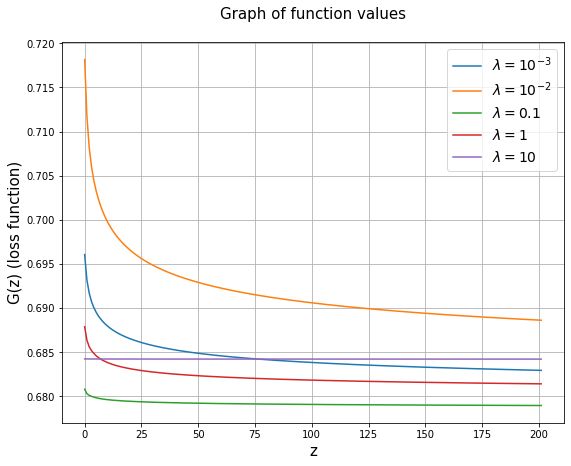

In [30]:
lambda_set = [10**-3,10**-2, 0.1, 1, 10]
data = train_data
label = train_label
plt.figure(figsize=(9,7))
for lamda in lambda_set:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array = OPT2_l(data,label,lamda)
  print([i[0] for i in fval_array])
  plt.plot(fval_array,label=r'$ $')
  plt.grid()
  plt.title('Graph of function values\n',fontsize=15)
  plt.xlabel(r'z',fontsize=15)
  plt.ylabel(r'G(z) (loss function)',fontsize=15)
  plt.legend(["$\lambda = 10^{-3}$","$\lambda = 10^{-2}$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"],fontsize=14)
plt.show()


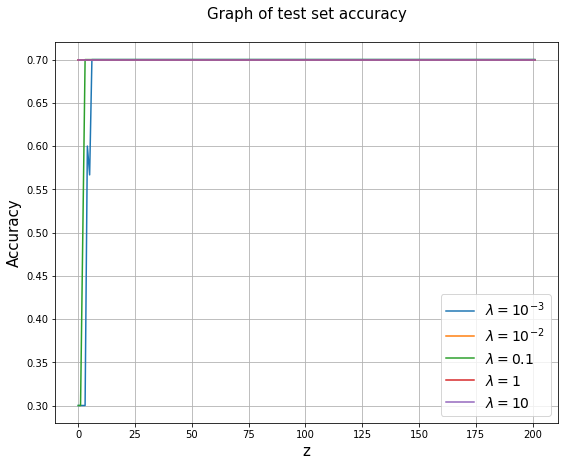

In [31]:
lambda_set = [10**-3,10**-2, 0.1, 1, 10]
data = train_data
label = train_label
plt.figure(figsize=(9,7))
for lamda in lambda_set:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array = OPT2_l(data,label,lamda)
  plt.plot(test_set_accuracy_array,label=r'$ $')
  plt.grid()
  plt.title('Graph of test set accuracy\n',fontsize=15)
  plt.xlabel(r'z',fontsize=15)
  plt.ylabel(r'Accuracy',fontsize=15)
  plt.legend(["$\lambda = 10^{-3}$","$\lambda = 10^{-2}$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"],fontsize=14)
plt.show()

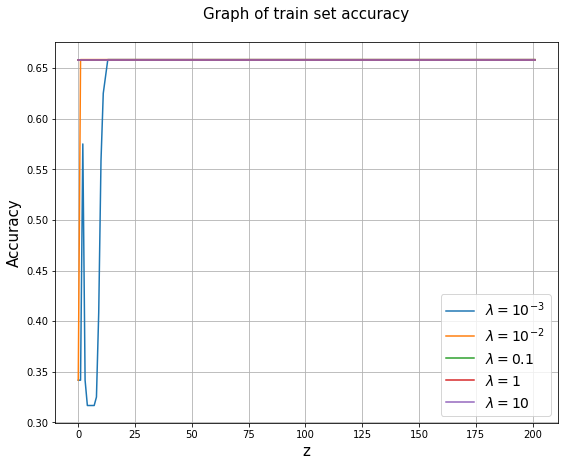

In [32]:
lambda_set = [10**-3,10**-2, 0.1, 1, 10]
data = train_data
label = train_label
plt.figure(figsize=(9,7))
for lamda in lambda_set:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array = OPT2_l(data,label,lamda)
  plt.plot(train_set_accuracy_array,label=r'$ $')
  plt.grid()
  plt.title('Graph of train set accuracy\n',fontsize=15)
  plt.xlabel(r'z',fontsize=15)
  plt.ylabel(r'Accuracy',fontsize=15)
  plt.legend(["$\lambda = 10^{-3}$","$\lambda = 10^{-2}$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"],fontsize=14)
plt.show()

In [33]:
lambda_set = [10**-3,10**-2, 0.1, 1, 10]
data = train_data
label = train_label
for lamda in lambda_set:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array = OPT2_l(data,label,lamda)
  print("\nlambda", lamda)
  print("Test set accuracy", test_set_accuracy_array[-1])
  print("Train set accuracy", train_set_accuracy_array[-1])


lambda 0.001
Test set accuracy 0.7
Train set accuracy 0.6583333333333333

lambda 0.01
Test set accuracy 0.7
Train set accuracy 0.6583333333333333

lambda 0.1
Test set accuracy 0.7
Train set accuracy 0.6583333333333333

lambda 1
Test set accuracy 0.7
Train set accuracy 0.6583333333333333

lambda 10
Test set accuracy 0.7
Train set accuracy 0.6583333333333333
